In [112]:
import pandas as pd
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


In [113]:
df = web.DataReader('AAPL', data_source= 'yahoo', start= '2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193


<function matplotlib.pyplot.show>

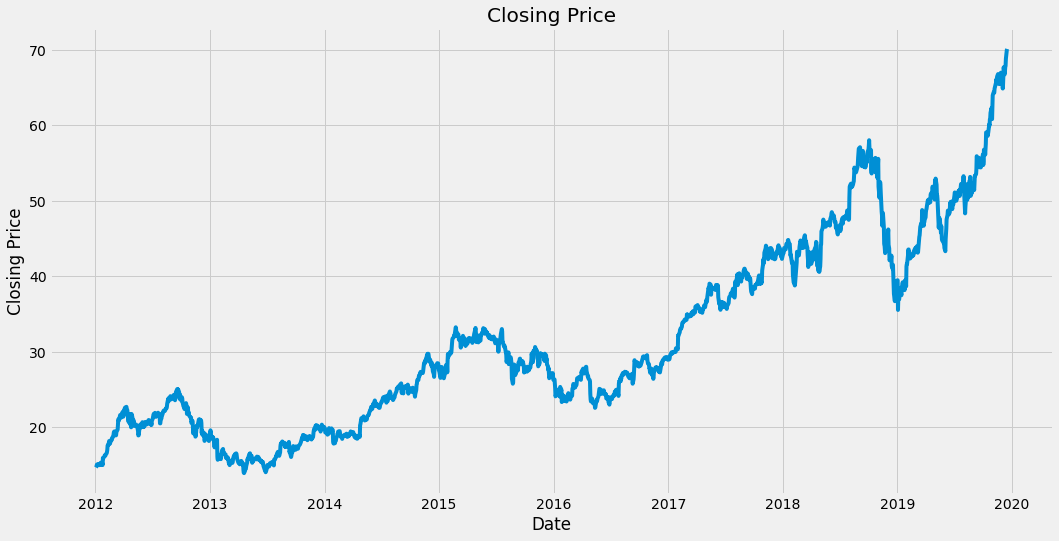

In [114]:
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show

In [115]:
 data  = df.filter(['Close'])

 dataset = data.values  

 training_data_length = math.ceil(len(dataset)* .8)


 training_data_length

1603

In [116]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [117]:
train_data = scaled_data[0:training_data_length, : ]
  
x_train = []
y_train = []

for i  in range (60, len(train_data)) :
  x_train.append(train_data[i-60:i , 0])
  y_train.append(train_data[i,0])


In [118]:

x_train, y_train = np.array(x_train), np.array(y_train)


In [119]:

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1  ))
x_train.shape

(1543, 60, 1)

In [120]:
model =Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [121]:
 model.compile(optimizer='adam', loss='mean_squared_error') 

In [122]:
model.fit(x_train, y_train, batch_size=1,epochs=5 )

Epoch 1/5
1543/1543 [==============================] - 10s 6ms/step - loss: 7.8041e-04
Epoch 2/5
1543/1543 [==============================] - 10s 6ms/step - loss: 3.3527e-04
Epoch 3/5
1543/1543 [==============================] - 9s 6ms/step - loss: 1.9852e-04
Epoch 4/5
1543/1543 [==============================] - 9s 6ms/step - loss: 2.1667e-04
Epoch 5/5
1543/1543 [==============================] - 10s 6ms/step - loss: 1.4695e-04


In [123]:
test_data= scaled_data[training_data_length - 60: , :]

x_test = []
y_test = dataset[training_data_length : , :]
for i in range (60,len(test_data)):
  x_test.append(test_data[i - 60 : i, 0])
  

In [124]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [125]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)


In [126]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)              #root mean square errori

rmse

1.0834146213531495

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


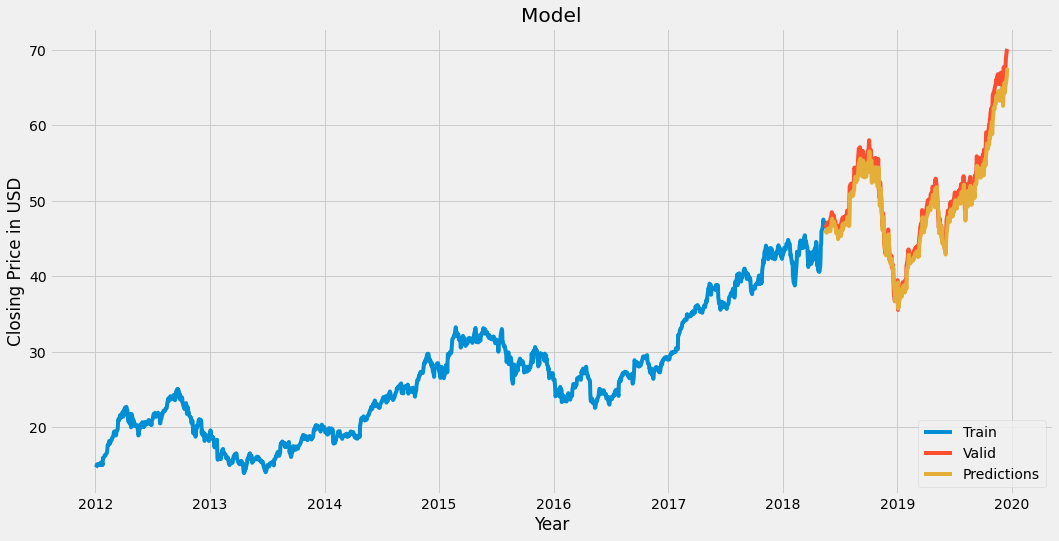

In [127]:
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Year")
plt.ylabel('Closing Price in USD') 
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train','Valid', 'Predictions'], loc='lower right')
 

In [128]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.150223
2018-05-18,46.577499,45.908867
2018-05-21,46.907501,45.758518
2018-05-22,46.790001,46.090984
2018-05-23,47.090000,46.003613
...,...,...
2019-12-11,67.692497,64.889160
2019-12-12,67.864998,65.445740
2019-12-13,68.787498,65.516205


In [129]:
model.save("Stock Predictions.h5")